In [2]:
import plaidml.keras

plaidml.keras.install_backend()
import plaidml.keras.backend

In [16]:
import datetime
import tensorflow as tf
from keras import datasets, callbacks
from keras import utils
from keras import layers, optimizers, Sequential
from keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Flatten,Dense
import numpy as np
import matplotlib.pyplot as plt
import math
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm

In [43]:
donutPaths = ["D:\\MyStuffs\\PythonScripts\\MLAIProject\\VideoToFrames\\data", "D:\\MyStuffs\\PythonScripts\\MLAIProject\\images\\data\\train\\donuts"]

amountOfImagesPer = 2051
imageSize = 128

datasets = []

donuts = []
for folder in donutPaths:
    for item in tqdm(os.listdir(folder)):
        path = os.path.join(folder, item)
        img = cv2.imread(path)        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (imageSize, imageSize))
        donuts.append( (img, 0) )

random.shuffle(donuts)
print(len(donuts))
donuts = donuts[0:amountOfImagesPer]

capcicum = []
capcicumsPath = ["D:\\MyStuffs\\PythonScripts\\MLAIProject\\CapsicumSet\\newGreen", "D:\\MyStuffs\\PythonScripts\\MLAIProject\\CapsicumSet\\newRed", "D:\\MyStuffs\\PythonScripts\\MLAIProject\\CapsicumSet\\newYellow", "D:\MyStuffs\PythonScripts\MLAIProject\Spliced_Capsicum"]
for folder in capcicumsPath:
    for item in tqdm(os.listdir(folder)):  
        path = os.path.join(folder, item)
        img = cv2.imread(path)        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (imageSize, imageSize))
        capcicum.append((img, 1))

random.shuffle(capcicum)
print(len(capcicum))
capcicum = capcicum[0:amountOfImagesPer]

other = []
otherPath = ["D:\\MyStuffs\\PythonScripts\\MLAIProject\\VideoToFrames\\dataOther"]
for folder in otherPath:
    for item in tqdm(os.listdir(folder)):
        path = os.path.join(folder, item)
        img = cv2.imread(path)        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (imageSize, imageSize))
        other.append((img, 2))
        
random.shuffle(other)
print(len(other))
#other = other[0:amountOfImagesPer]


datasets += donuts
datasets += capcicum
datasets += other
random.shuffle(datasets)

100%|███████████████████████████████████████████████████████████████████████████████| 877/877 [00:02<00:00, 354.92it/s]


2501


100%|██████████████████████████████████████████████████████████████████████████████| 2189/2189 [00:48<00:00, 44.83it/s]


3215


100%|█████████████████████████████████████████████████████████████████████████████| 1734/1734 [00:03<00:00, 576.11it/s]

1734


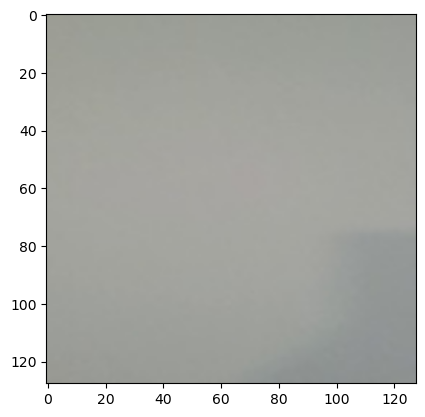

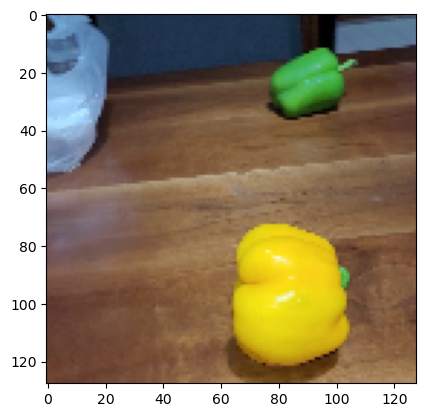

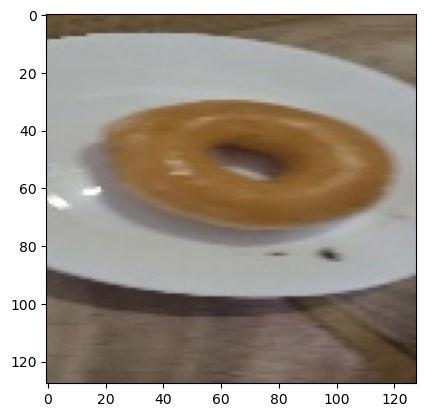

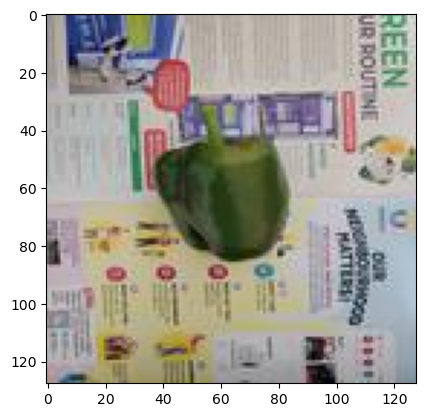

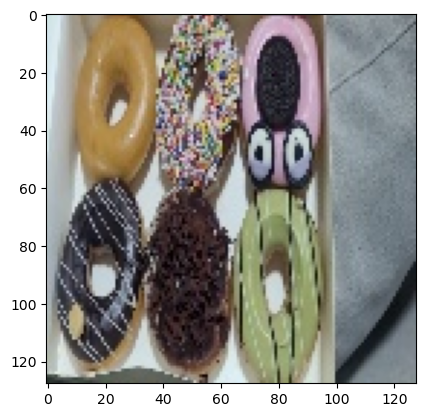

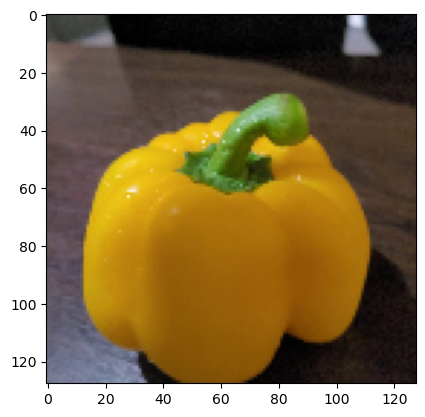

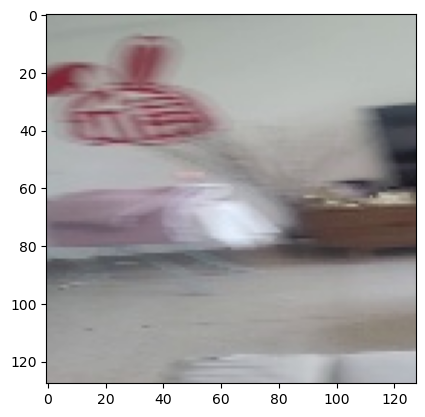

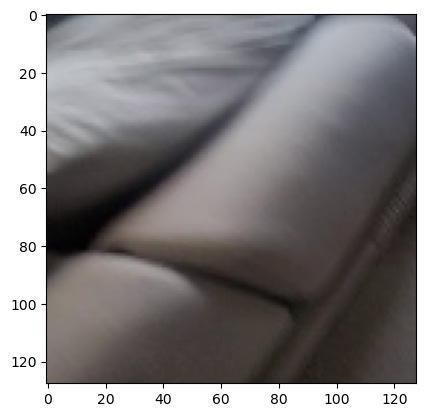

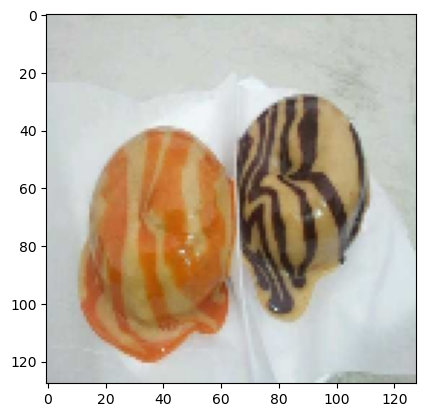

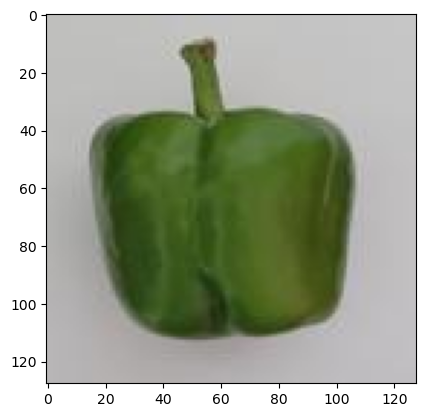

complete


In [41]:
X = []
Y = []
for data, label in datasets:
    X.append(data)
    Y.append(label)
X = np.array(X).reshape(-1, imageSize, imageSize, 3)
Y = np.array(Y)

for i in range(10):
    index = random.randint(0, len(datasets))
    plt.imshow(X[index])
    plt.show()
X = X/255.0
Y = utils.to_categorical(Y, 2)
np.save("X", X)
np.save("Y", Y)
print("complete")